In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DataScience/Portofolio Data/Online Retail Data/Online_Retail.csv", encoding='windows-1254')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


## let’s check for null/missing values.

In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.dropna(inplace=True)

## Check any outlier in this Data
If the dataset has outliers we will replace them with columns mean.

In [29]:
import numpy as np
import pandas as pd

def detect_and_replace_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i, y in enumerate(data):
        z_score = (y - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers

# Assuming df is your DataFrame with numerical columns

num_cols = df.select_dtypes(include=[np.number]).columns

for item in num_cols:
    if item != 'CustomerID':
        column_mean = df[item].mean()
        print(f'Outliers in {item}:')

        outliers = detect_and_replace_outliers(df[item])

        if len(outliers) > 0:
            print(outliers)

            # Reset the DataFrame index to ensure alignment
            df.reset_index(drop=True, inplace=True)

            # Replace outliers with the column mean
            df.loc[outliers, item] = column_mean

# Now, outliers in the selected columns have been replaced with the column mean


Outliers in Quantity:
[3102, 3645, 3740, 3741, 4286, 10938, 10939, 10946, 10947, 12517, 13220, 13329, 16891, 22229, 25239, 26017, 33073, 33074, 33075, 33076, 33645, 33646, 33647, 33707, 38120, 38125, 39034, 48181, 51157, 51269, 52241, 52244, 54994, 54995, 54996, 55892, 57188, 57838, 59194, 63331, 65021, 72532, 72534, 74087, 76098, 80085, 82325, 82328, 82329, 84449, 84450, 88623, 95244, 96422, 97537, 97539, 97580, 97586, 98258, 103771, 107572, 107574, 112369, 112370, 112371, 112372, 112435, 112436, 112438, 112439, 114611, 114612, 114614, 114615, 116166, 117910, 119052, 119054, 124818, 128379, 130369, 131075, 131861, 139134, 143113, 143752, 143835, 143836, 145200, 146796, 148552, 158463, 158485, 159832, 160719, 165208, 175794, 175805, 175808, 180125, 180448, 181630, 193523, 197565, 199360, 201660, 203416, 203431, 205538, 208115, 209077, 209079, 215024, 219620, 219629, 220187, 226187, 231378, 232387, 232651, 233478, 234817, 240323, 241914, 253910, 254654, 254655, 254656, 254660, 254661, 2

**RFM Analysis**

In [30]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']
recency = df.groupby('CustomerID')['Diff'].min()
recency = recency.dt.days
recency = recency.reset_index()

In [31]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [32]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary

,CustomerID,Amount
0,12346.0,25.087511
1,12347.0,4310.000000
2,12348.0,1797.240000
3,12349.0,1461.010471
4,12350.0,334.400000
...,...,...
4367,18280.0,180.600000
4368,18281.0,80.820000
4369,18282.0,176.600000
4370,18283.0,2094.880000


In [33]:
rfm = pd.merge(recency, frequency, on='CustomerID')
rfm = pd.merge(rfm, monetary, on='CustomerID')
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,25.087511
1,12347.0,1,182,4310.000000
2,12348.0,74,31,1797.240000
3,12349.0,18,73,1461.010471
4,12350.0,309,17,334.400000
...,...,...,...,...
4367,18280.0,277,10,180.600000
4368,18281.0,180,7,80.820000
4369,18282.0,7,13,176.600000
4370,18283.0,3,756,2094.880000


In [34]:
from sklearn.preprocessing import StandardScaler
rfm_scaled = rfm[['Recency', 'Frequency', 'Monetary']]
rfm_scaled = StandardScaler().fit_transform(rfm_scaled)
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_scaled

,Recency,Frequency,Monetary
0,2.322023,-0.391720,-0.233555
1,-0.893733,0.382657,0.312245
2,-0.169196,-0.266959,-0.007823
3,-0.725005,-0.086271,-0.050651
4,2.163220,-0.327188,-0.194155
...,...,...,...
4367,1.845615,-0.357303,-0.213746
4368,0.882873,-0.370209,-0.226456
4369,-0.834182,-0.344397,-0.214255
4370,-0.873883,2.852058,0.030089


After we calculate RFM values, we group those values for each group

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

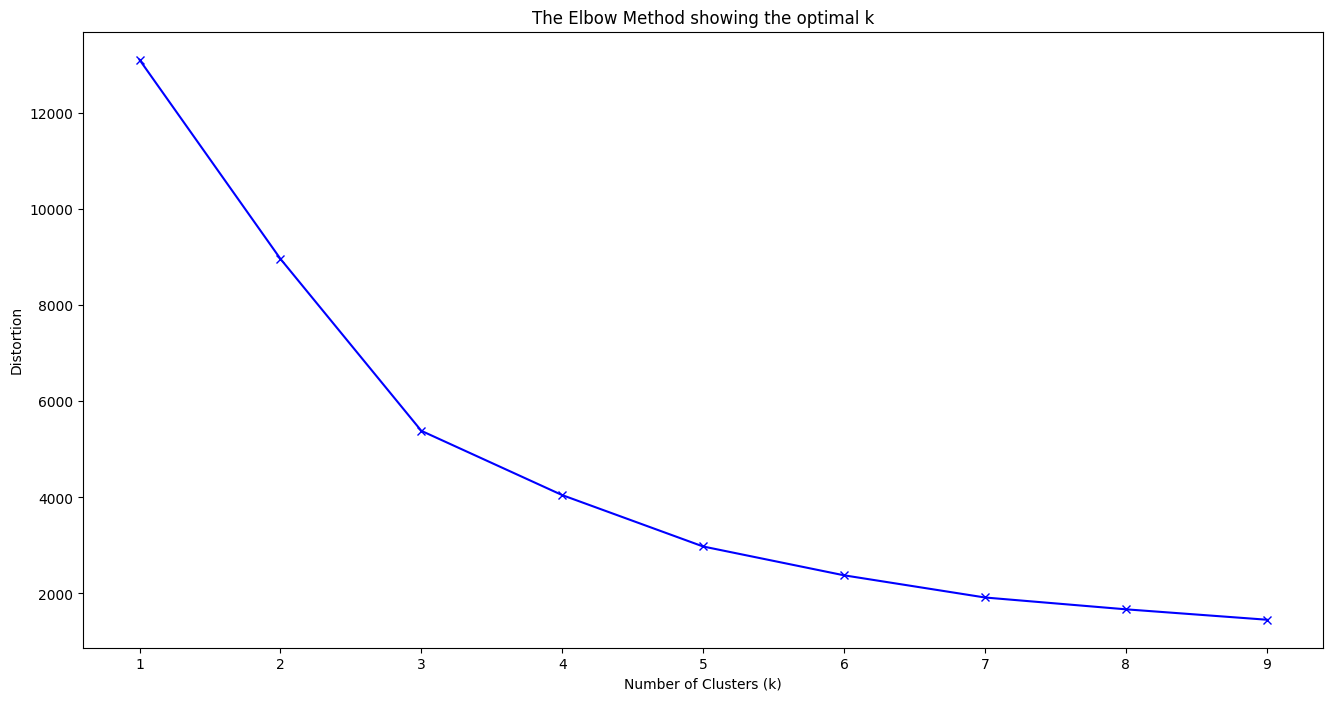

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
range_n_clusters = range(1, 10)

for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=num_cluster)
    kmeans.fit(rfm_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(16, 8))
plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt